# Main Figures

Code to generate main figures.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy import stats
%matplotlib inline  
%run RNA_pop_model.py

In [3]:
data_set_pop = {}
ind = ['r0.0', 'r0.1', 'r0.5', 'r1.0', 'F100', 'F10', 'F50', 'F500', 'N10', 'N50', 'N500','SSWM']
loc_dir = './raw_data/'
for i in ind:
    if i == 'F100':
        path  =  loc_dir + 'bp_12_N_100_u_0.001_r_free/'
    elif i == 'r0.0':
        path = loc_dir + 'bp_12_N_100_u_0.001_r_0.0/'
    elif i == 'r0.1':
        path = loc_dir + 'bp_12_N_100_u_0.001_r_0.1/'
    elif i == 'r0.5':
        path = loc_dir + 'bp_12_N_100_u_0.001_r_0.5/'
    elif i == 'r1.0':
        path = loc_dir + 'bp_12_N_100_u_0.001_r_1.0/'
    elif i == 'F10':
        path = loc_dir + 'bp_12_N_10_u_0.001_r_free/'
    elif i == 'F50':
        path = loc_dir + 'bp_12_N_50_u_0.001_r_free/'
    elif i == 'F500':
        path = loc_dir + '/bp_12_N_500_u_0.001_r_Free/'
    elif i == 'N10':
        path = loc_dir + 'bp_12_N_10_u_0.001_r_0.0/'
    elif i == 'N50':
        path = loc_dir + 'bp_12_N_50_u_0.001_r_0.0/'
    elif i == 'N500':
        path = loc_dir + 'bp_12_N_500_u_0.001_r_0.0/'
    elif i == 'SSWM':
        path = loc_dir+ 'bp_12_N_1_u_0.001_r_0.0/'

    stat_pop = {}
    count = 0
    for filename in os.listdir(path):
        name = path + filename
        if os.path.getsize(name) > 0:
            file = open(name, 'r')
            run = pickle.load(file)
            stat_pop[count] = run
            file.close()
            count += 1
    data_set_pop[i] = stat_pop

In [26]:
D_pop = {}
for i in ind:
    temp = []
    for j in data_set_pop[i].keys():
        temp.append(data_set_pop[i][j]['divergence'])
    D_pop[i] = np.array(temp)
    
rec_load_pop = {}
for i in ind:
    temp = []
    for j in data_set_pop[i].keys():
        temp.append(data_set_pop[i][j]['rec_load'])
    rec_load_pop[i] = np.array(temp)
    
Dist = {}
for i in ind:
    temp = []
    for j in data_set_pop[i].keys():
         temp.append(data_set_pop[i][j]['lin1_bp'])
    Dist[i] = np.array(temp)
    
DJ = {}
for i in ind:
    temp = []
    for j in data_set_pop[i].keys():
        value = data_set_pop[i][j]['D']
        temp.append(value)
    DJ[i] = np.array(temp)
    
HS = {}
for i in ind:
    temp = []
    for j in data_set_pop[i].keys():
        value = data_set_pop[i][j]['HS']
        temp.append(value)
    HS[i] = np.array(temp)
    
holeyness_pop = {}
for i in ind:
    temp = []
    for j in data_set_pop[i].keys():
        temp.append(1. - np.divide(data_set_pop[i][j]['holeyness'], 300.))
    holeyness_pop[i] = np.array(temp)

sDMI_pop = {}
for i in ind:
    single = []
    for j in data_set_pop[i].keys():
        single.append(data_set_pop[i][j]['single'])
    sDMI_pop[i] = np.array(single)
    
segDMI = {}
for i in ind[:-1]:
    temp = []
    for j in data_set_pop[i].keys():
        temp.append(data_set_pop[i][j]['single_seg'])
    segDMI[i] = np.array(temp)
    
RI_free = {}
for i in ind:
    temp = []
    for j in data_set_pop[i].keys():
        temp.append(data_set_pop[i][j]['RI_max'])
    RI_free[i] = np.array(temp)

## Figure 3

Loading the rates calculated using the ML method

In [5]:
rates_1 = pd.read_csv('./rates.txt', sep=' ')
rates_1.head()

,rec,N,b,blo,bup
0,no,1,62.62975,58.97489,66.28460
1,no,10,56.73941,53.38381,60.09500
2,no,50,51.89262,49.19128,54.59396
3,no,100,52.25948,49.59609,54.92287
4,no,500,50.77704,46.54822,55.00585


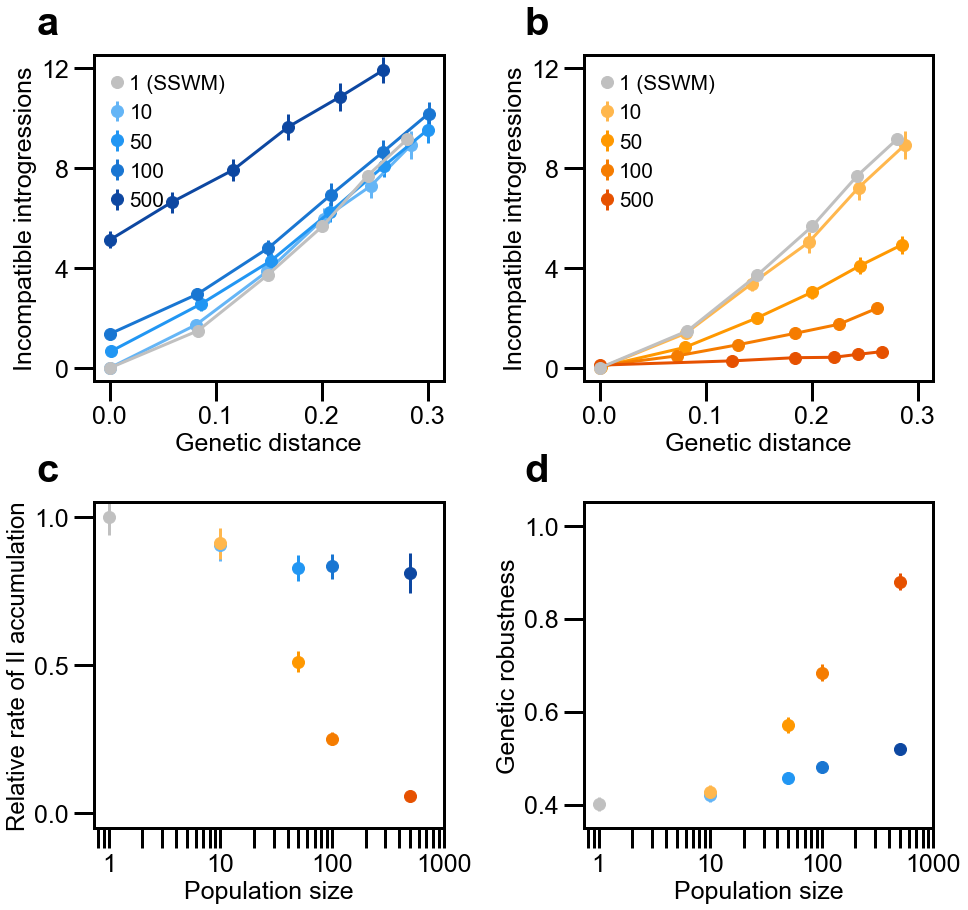

In [13]:
grad_1 = ['#64B5F6', '#2196F3', '#1976D2', '#0D47A1']
grad_2 = ['#FFB74D', '#FF9800', '#F57C00', '#E65100']

fig, ax = plt.subplots(2, 2, figsize=(14,12.8))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 25})
for i in [0,1]:
    for j in [0, 1]:
        ax[i][j].tick_params(axis='x', which='both', bottom=True, top=False,
                             labelbottom=True, size=20, width=3, direction='out', pad=5, colors='black')
        ax[i][j].tick_params(axis='y', which='both', left=True, right=False,
                             labelbottom=False, size=20, width=3, direction='out', pad=5, colors='black')
        ax[i][j].spines['right'].set_visible(True)
        ax[i][j].spines['top'].set_visible(True)
        ax[i][j].spines['bottom'].set_visible(True)
        ax[i][j].spines['left'].set_visible(True)
        ax[i][j].spines['left'].set_linewidth(3)
        ax[i][j].spines['bottom'].set_linewidth(3)
        ax[i][j].spines['right'].set_linewidth(3)
        ax[i][j].spines['top'].set_linewidth(3)
        ax[i][j].spines['bottom'].set_color('black')
        ax[i][j].spines['left'].set_color('black')
        if i==0 and j == 0:
            label = 'a'
        elif i==0 and j == 1:
            label = 'b'
        elif i==1 and j == 0:
            label = 'c'
        else:
            label = 'd'
        ax[i][j].text(-0.1, 1.15, label, transform=ax[i][j].transAxes, fontsize=40, fontweight='bold', va='top', ha='right')
            
        
count = 0
for i,j in zip(['SSWM', 'N10', 'N50', 'r0.0', 'N500'], ['1 (SSWM)', '10','50', '100', '500']):
    if i == '0.0':
        x = np.mean(DJ[i], axis=0)
        y2 = np.mean(sDMI_pop[i], axis=0)
    else:
        x = np.mean(DJ[i], axis=0)
        y2 = np.mean(sDMI_pop[i], axis=0)
    if i == 'SSWM':
        ax[0][0].errorbar(x, y2, lw=3, label=j, fmt='o-', color='silver', zorder=5, capsize=0, markersize=12, clip_on=False)
    else:
        err = 1.96* np.std(sDMI_pop[i], axis=0) / np.sqrt(len(sDMI_pop[i]))
        ax[0][0].errorbar(x, y2, yerr=err, fmt='o-', linewidth=3, capsize=0, markersize=12, clip_on=False, label=j, color=grad_1[count])
        count += 1
        
ax[0][0].set_ylabel('Incompatible introgressions')
ax[0][0].set_ylim(-0.5, 12.5)
ax[0][0].set_xlim(-0.015, 0.315)
ax[0][0].set_yticks([ 0,  4,  8, 12])
ax[0][0].set_xlabel(r"Genetic distance")

count = 0
for i,j in zip(['SSWM', 'F10', 'F50', 'F100', 'F500'], ['1 (SSWM)', '10','50', '100', '500']):
    x = np.mean(DJ[i], axis=0)
    y = np.mean(sDMI_pop[i], axis=0)
    if i == 'SSWM':
        ax[0][1].errorbar(x, y, lw=3, label=j, fmt='o-', color='silver', zorder=5, capsize=0, markersize=12, clip_on=False,)
    else:
        err = 1.96* np.std(sDMI_pop[i], axis=0) / np.sqrt(len(sDMI_pop[i]))
        ax[0][1].errorbar(x, y, yerr=err, fmt='o-', linewidth=3, capsize=0, markersize=12, clip_on=False, label=j, color=grad_2[count])
        count += 1
ax[0][1].set_ylim(-0.5, 12.5) 
ax[0][1].set_yticks([ 0,  4,  8, 12])
ax[0][1].set_xlim(-0.015, 0.315)
ax[0][1].set_ylabel('Incompatible introgressions')
ax[0][1].set_xlabel(r"Genetic distance")


new_grad = ['silver'] + grad_1
tmp = rates_1[rates_1['rec']=='no']
sswm_b = rates_1[(rates_1['rec']=='no') & (rates_1['N']==1)]['b']
y = np.divide(tmp['b'],sswm_b)
e_up = list(np.divide(tmp['bup'],sswm_b))
e_lo = list(np.divide(tmp['blo'],sswm_b))
count = 0
for i,j in zip(tmp['N'], y):
    ax[1][0].errorbar(i, j, fmt='o', yerr=[[j - e_lo[count]],[e_up[count] - j]] , color=new_grad[count], linewidth=3, capsize=0, markersize=12, clip_on=False)
    count += 1
    
new_grad = grad_2
# sswm_b = rates_1[(rates_1['rec']=='free') & (rates_1['N']==1)]['b']
tmp = rates_1[rates_1['rec']=='free']
y = np.divide(tmp['b'],sswm_b)
e_up = list(np.divide(tmp['bup'],sswm_b))
e_lo = list(np.divide(tmp['blo'],sswm_b))
count = 0
for i,j in zip(tmp['N'], y):
    ax[1][0].errorbar(i, j, fmt='o', yerr=[[j - e_lo[count]],[e_up[count] - j]] , color=new_grad[count], linewidth=3, capsize=0, markersize=12, clip_on=False)
    count += 1
    
ax[1][0].set_ylabel('Relative rate of II accumulation', fontsize=24)
ax[1][0].set_xscale('log')
ax[1][0].set_ylim(-0.05, 1.05)
ax[1][0].set_yticks([0, 0.5, 1])
# ax[1][0].set_xlim(right=1000)
ax[1][0].set_xlabel(r"Population size")
ax[1][0].set_xticks([1.e+00, 1.e+01, 1.e+02, 1.e+03])
ax[1][0].set_xticklabels([1, 10, 100, 1000])

    
size =150
count = 0
for i,j in zip(['SSWM',  'N10', 'N50', 'r0.0', 'N500'],  [1, 10, 50, 100, 500]):
    err = 1.96* np.std(holeyness_pop[i]) / np.sqrt(len(holeyness_pop[i]))
    if i == 'SSWM':
        ax[1][1].errorbar(j, np.mean(holeyness_pop[i]), fmt='o', linewidth=3, yerr=err, color='silver', capsize=0, markersize=12, clip_on=False)
    else:
        ax[1][1].errorbar(j, np.mean(holeyness_pop[i]), fmt='o', linewidth=3, yerr=err, color=grad_1[count], capsize=0, markersize=12, clip_on=False)
        count += 1
count = 0
for i,j in zip(['F10', 'F50', 'F100', 'F500'],  [10, 50, 100, 500]):
    err = 1.96* np.std(holeyness_pop[i]) / np.sqrt(len(holeyness_pop[i]))
    ax[1][1].errorbar(j, np.mean(holeyness_pop[i]), fmt='o', linewidth=3, yerr=err, color=grad_2[count], capsize=0, markersize=12, clip_on=False)
    count += 1
        
ax[1][1].set_ylabel('Genetic robustness')
ax[1][1].set_ylim(0.35, 1.05)
ax[1][1].set_xscale('log')
# ax[1][1].set_xlim(right=1000)
ax[1][1].set_xlabel(r"Population size")
ax[1][1].set_xticks([1.e+00, 1.e+01, 1.e+02, 1.e+03])
ax[1][1].set_xticklabels([1, 10, 100, 1000])

legend = ax[0][0].legend(loc='best', shadow=False, fontsize='small',framealpha=0.,handlelength=0.4, handletextpad=0.4, markerscale=1)
legend = ax[0][1].legend(loc='best', shadow=False, fontsize='small',framealpha=0.,handlelength=0.4, handletextpad=0.4, markerscale=1)

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()

## Figure 4

In [15]:
rates_2 = pd.read_csv('./rates_seg.txt', sep=',')

In [16]:
rates_2.head()

,regime,sIIs,sIIslo,sIIsup
0,r0.1,0.457750,0.437490,0.478010
1,F10,0.003708,0.002341,0.005075
2,N500,5.456167,5.254464,5.657870
3,r1.0,0.185792,0.177067,0.194516
4,r0.0,1.313292,1.250604,1.375980


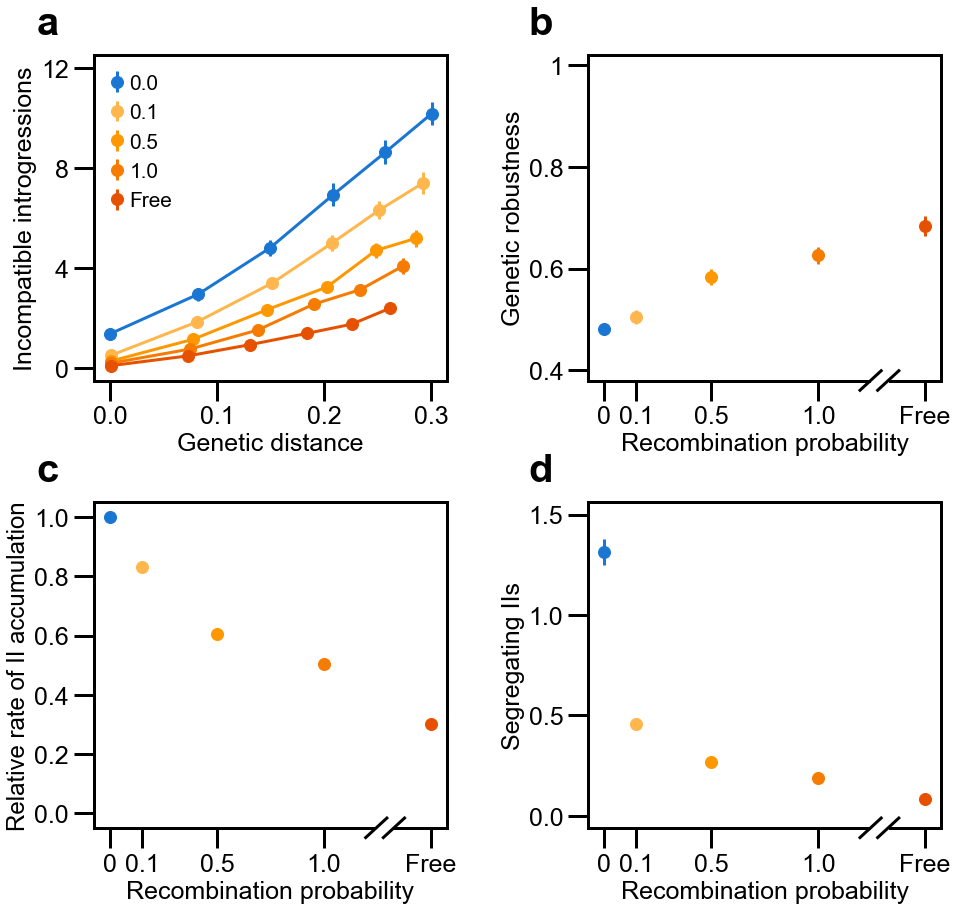

In [17]:
grad_1 = ['#1976D2', '#FFB74D', '#FF9800', '#F57C00', '#E65100']

fig, ax = plt.subplots(2, 2, figsize=(14,12.8))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 25})
#ax = fig.add_subplot(111)
for i in [0,1]:
    for j in [0, 1]:
        ax[i][j].tick_params(axis='x', which='both', bottom=True, top=False,
                             labelbottom=True, size=20, width=3, direction='out', pad=5, colors='black')
        ax[i][j].tick_params(axis='y', which='both', left=True, right=False,
                             labelbottom=False, size=20, width=3, direction='out', pad=5, colors='black')
        ax[i][j].spines['right'].set_visible(True)
        ax[i][j].spines['top'].set_visible(True)
        ax[i][j].spines['bottom'].set_visible(True)
        ax[i][j].spines['left'].set_visible(True)
        ax[i][j].spines['left'].set_linewidth(3)
        ax[i][j].spines['bottom'].set_linewidth(3)
        ax[i][j].spines['right'].set_linewidth(3)
        ax[i][j].spines['top'].set_linewidth(3)
        ax[i][j].spines['bottom'].set_color('black')
        ax[i][j].spines['left'].set_color('black')
        if i==0 and j == 0:
            label = 'a'
        elif i==0 and j == 1:
            label = 'b'
        elif i==1 and j == 0:
            label = 'c'
        else:
            label = 'd'
        ax[i][j].text(-0.1, 1.15, label, transform=ax[i][j].transAxes, fontsize=40, fontweight='bold', va='top', ha='right')
            
        
count = 0
for i,j in zip(['r0.0', 'r0.1', 'r0.5', 'r1.0', 'F100'], ['0.0', '0.1', '0.5', '1.0', 'Free']):
    x = np.mean(DJ[i], axis=0)
    y2 = np.mean(sDMI_pop[i], axis=0)
    if i == 'SSWM':
        ax[0][0].errorbar(x, y2, lw=3, label='1 (SSWM)', fmt='--', color='black', zorder=5)
    else:
        err = 1.96* np.std(sDMI_pop[i], axis=0) / np.sqrt(len(sDMI_pop[i]))
        ax[0][0].errorbar(x, y2, yerr=err, fmt='o-', linewidth=3, capsize=0, markersize=12, clip_on=False, label=j, color=grad_1[count])
        count += 1
        
ax[0][0].set_ylabel('Incompatible introgressions')
ax[0][0].set_xlabel(r"Genetic distance")
ax[0][0].set_ylim(-0.5, 12.5)
ax[0][0].set_xlim(-0.015, 0.315)
ax[0][0].set_yticks([ 0,  4,  8, 12])

size =150
count = 0
for i,j in zip(['r0.0', 'r0.1', 'r0.5', 'r1.0', 'F100'], [0, 0.15, 0.5, 1.0, 1.5]):
    err = 1.96* np.std(holeyness_pop[i]) / np.sqrt(len(holeyness_pop[i]))
    ax[0][1].errorbar(j, np.mean(holeyness_pop[i]), fmt='o',  linewidth=3, yerr=err, color=grad_1[count], capsize=0, markersize=12, clip_on=False)
    count += 1
        
ax[0][1].set_xticks([0, 0.15, 0.5, 1.0, 1.5])
ax[0][1].set_xticklabels([0, 0.1, 0.5, 1.0, 'Free'])
ax[0][1].set_yticks(np.linspace(0.4, 1, 4))
ax[0][1].set_yticklabels([0.4, 0.6, 0.8, 1])
ax[0][1].set_ylim(0.38, 1.02)
ax[0][1].set_ylabel(r'Genetic robustness')
ax[0][1].set_xlabel(r'Recombination probability')
ax[0][1].add_patch(patches.Rectangle((1.245, 0.375), 0.08, .01, color="white", fill=True, clip_on=False, zorder=9))
d = 0.03  # line length 
ax[0][1].plot((0.8-d, 0.8+d), (-d, +d), c='k',linewidth=3, clip_on=False, transform=ax[0][1].transAxes, zorder=10)
ax[0][1].plot((0.85 - d, 0.85 + d), (-d, +d), c='k', linewidth=3, clip_on=False, transform=ax[0][1].transAxes, zorder=10)

count = 0
for i,j in zip([0, 0.15, 0.5, 1.0, 1.5], ['no', '0.1', '0.5', '1', 'free']):
    y_val = np.divide(rates_1[(rates_1['rec']==j) & (rates_1['N']==100)]['b'], rates_1[(rates_1['rec']=='no') & (rates_1['N']==100)]['b'])
    e_up = float(np.divide(rates_1[(rates_1['rec']==j) & (rates_1['N']==100)]['bup'],rates_1[(rates_1['rec']=='no') & (rates_1['N']==100)]['bup']))
    e_lo = float(np.divide(rates_1[(rates_1['rec']==j) & (rates_1['N']==100)]['blo'],rates_1[(rates_1['rec']=='no') & (rates_1['N']==100)]['blo']))
    ax[1][0].errorbar(i, y_val, yerr=[[float(y_val-e_lo)],[float(e_up-y_val)]],fmt='o', color=grad_1[count], linewidth=3, capsize=0, markersize=12, clip_on=False)
    count += 1


ax[1][0].set_xticks([0, 0.15, 0.5, 1.0, 1.5])
ax[1][0].set_xticklabels([0, 0.1, 0.5, 1.0, 'Free'])
ax[1][0].set_ylabel('Relative rate of II accumulation', fontsize=24)
ax[1][0].set_ylim(-0.05, 1.05)
ax[1][0].set_xlabel(r'Recombination probability')
ax[1][0].add_patch(patches.Rectangle((1.245, -0.055), 0.08, .01, color="white", fill=True, clip_on=False, zorder=9))
d = 0.03  # line length 
ax[1][0].plot((0.8-d, 0.8+d), (-d, +d), c='k',linewidth=3, clip_on=False, transform=ax[1][0].transAxes, zorder=10)
ax[1][0].plot((0.85 - d, 0.85 + d), (-d, +d), c='k', linewidth=3, clip_on=False, transform=ax[1][0].transAxes, zorder=10)  



y = []
y_up = []
y_lo = []
for i in ['r0.0', 'r0.1', 'r0.5', 'r1.0', 'F100']:
    y.append(float(rates_2[rates_2['regime']==i]['sIIs']))
    y_up.append(float(rates_2[rates_2['regime']==i]['sIIsup']))
    y_lo.append(float(rates_2[rates_2['regime']==i]['sIIslo']))

count = 0
for i,j in zip([0, 0.15, 0.5, 1.0, 1.5], y):
    ax[1][1].errorbar(i, j, fmt='o', yerr=[[j - y_lo[count]],[y_up[count] - j]] , color=grad_1[count], linewidth=3, capsize=0, markersize=12, clip_on=False)
    count += 1
ax[1][1].set_xlabel(r'Recombination probability')
ax[1][1].set_ylabel(r'Segregating IIs')
ax[1][1].set_xticks([0, 0.15, 0.5, 1.0, 1.5])
ax[1][1].set_xticklabels([0, 0.1, 0.5, 1.0, 'Free'])
ax[1][1].set_ylim(-0.06, 1.56)
#ax[1][1].set_yticks(np.linspace(0, 0.20, 3))
#ax[1][1].set_yticklabels([0, 0.1, 0.2])
ax[1][1].add_patch(patches.Rectangle((1.245, -0.07), 0.08, .02, color="white", fill=True, clip_on=False, zorder=9))
d = 0.03  # line length 
ax[1][1].plot((0.8-d, 0.8+d), (-d, +d), c='k',linewidth=3, clip_on=False, transform=ax[1][1].transAxes, zorder=10)
ax[1][1].plot((0.85 - d, 0.85 + d), (-d, +d), c='k', linewidth=3, clip_on=False, transform=ax[1][1].transAxes, zorder=10)


legend = ax[0][0].legend(loc='best', shadow=False, fontsize='small',framealpha=0.,handlelength=0.4, handletextpad=0.4, markerscale=1)
legend = ax[0][1].legend(loc='best', shadow=False, fontsize='small',framealpha=0.,handlelength=0.4, handletextpad=0.4, markerscale=1)

plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
plt.show()

## Figure 5

In [18]:
back_test = {}
for i in ['0.0', '0.1', '0.5', '1.0', 'Free']:
    path = loc_dir + 'back_test/bp_12_N_100_u_0.001_r_' + i + '/'
    temp = {}
    count = 0
    for filename in os.listdir(path):
        name = path + filename
        if os.path.getsize(name) > 0:
            file = open(name, 'r')
            run = pickle.load(file)
            temp[count] = run['fixed_sin']
            file.close()
            count += 1
    back_test[i] = temp

In [19]:
n_sin_v_assay = {}
for i in ['0.0', '0.1', '0.5', '1.0', 'Free']:
    temp = [back_test[i][j]['backcross_non_II'] for j in range(len(back_test[i]))]
    n_sin_v_assay[i] = temp
    
n_sin_assay = {}
for i in ['0.0', '0.1', '0.5', '1.0', 'Free']:
    temp = [back_test[i][j]['backcross_II'] for j in back_test[i]]
    n_sin_assay[i] = temp
    
anc_rob = {}
for i in ['0.0', '0.1', '0.5', '1.0', 'Free']:
    temp = [1 - np.divide(back_test[i][j]['current_rob_II'], 300) for j in back_test[i]]
    anc_rob[i] = temp

curr_rob = {}
for i in ['0.0', '0.1', '0.5', '1.0', 'Free']:
    temp = [1 - np.divide(back_test[i][j]['anc_rob_II'], 300) for j in back_test[i]]
    curr_rob[i] = temp

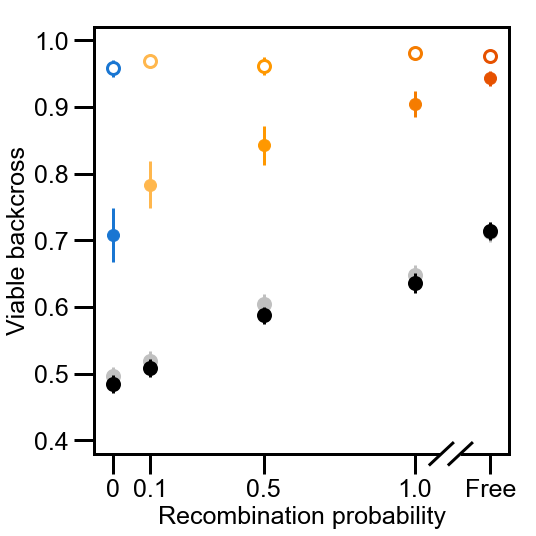

In [20]:
grad = ['#1976D2', '#FFB74D', '#FF9800', '#F57C00', '#E65100']

fig, ax = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 25})
ax.tick_params(axis='x', which='both', bottom=True, top=False,
    labelbottom=True, size=20, width=3, direction='out', pad=5, colors='black')
ax.tick_params(axis='y', which='both', left=True, right=False,
    labelbottom=False, size=20, width=3, direction='out', pad=5, colors='black')
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
#plt.grid(True)

count = 0
for i,j in zip(['0.0', '0.1', '0.5', '1.0', 'Free'],  [0, 0.1, 0.4, 0.8, 1]):
    y = np.mean(n_sin_v_assay[i])
    err = 1.96*np.std(n_sin_v_assay[i])/np.sqrt(len(n_sin_v_assay[i]))
    ax.errorbar(j, y, yerr=err, fmt='-o',linewidth=3, capsize=0,mew=3, mfc='w', markersize=12, clip_on=False, color=grad[count])
    count += 1
    
count = 0
for i,j in zip(['0.0', '0.1', '0.5', '1.0', 'Free'],  [0, 0.1, 0.4, 0.8, 1]):
    y = np.mean(n_sin_assay[i]) 
    err = 1.96*np.std(n_sin_assay[i])/np.sqrt(len(n_sin_assay[i]))
    ax.errorbar(j, y, yerr=err, fmt='-o',linewidth=3, capsize=0, markersize=12, clip_on=False, color=grad[count])
    count += 1

ci = [1.96*np.std(anc_rob[i])/np.sqrt(len(anc_rob[i])) for i in ['0.0', '0.1', '0.5', '1.0', 'Free']]

ax.errorbar([0, 0.1, 0.4, 0.8, 1], [np.mean(anc_rob[i]) for i in ['0.0', '0.1', '0.5', '1.0', 'Free']], 
    yerr=ci, fmt='o', linewidth=3, capsize=0, 
    markersize=15, clip_on=False, 
    mew=0.01, elinewidth=3, color='black', ecolor='black', zorder=3)

ci = [1.96*np.std(curr_rob[i])/np.sqrt(len(curr_rob[i])) for i in ['0.0', '0.1', '0.5', '1.0', 'Free']]

ax.errorbar([0, 0.1, 0.4, 0.8, 1], [np.mean(curr_rob[i]) for i in ['0.0', '0.1', '0.5', '1.0', 'Free']], 
    yerr=ci, fmt='o', linewidth=3, capsize=0, 
    markersize=15, clip_on=False, 
    mew=0.01, elinewidth=3, color='silver', ecolor='silver', alpha=1, zorder=2)


plt.xticks([0, 0.1, 0.4, 0.8, 1], [0, 0.1, 0.5, 1.0, 'Free'])
plt.yticks(np.linspace(0.4, 1, 7))
plt.ylim(0.38, 1.02)
ax.set_ylabel(r'Viable backcross')
ax.set_xlabel(r'Recombination probability')
plt.tight_layout()

ax.add_patch(patches.Rectangle((0.87,0.35), 0.05, .05, color="white", fill=True, clip_on=False, zorder=9))

d = 0.025  
ax.plot((0.84-d - 0.0058, 0.845+d - 0.0058), (-d, +d), c='k',linewidth=3, clip_on=False, transform=ax.transAxes, zorder=10)

ax.plot((0.84-d +0.04, 0.845+d+0.04), (-d, +d), c='k',linewidth=3, clip_on=False, transform=ax.transAxes, zorder=10)


plt.show()

## Figure 6

In [24]:
file = open("./RI_assay", 'r')
RI_test = pickle.load(file)
file.close()
df = pd.DataFrame(RI_test)

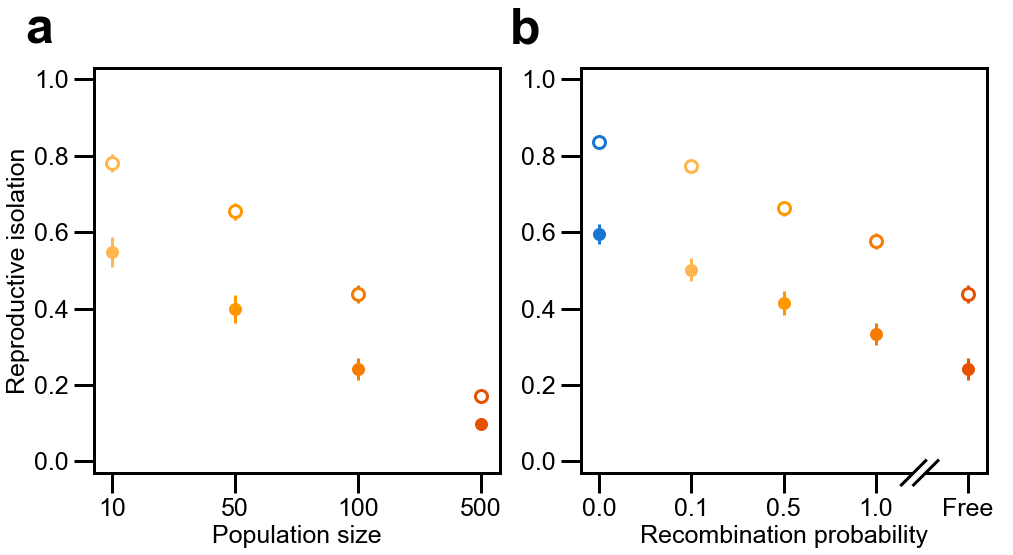

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7.45))

grad_1 = ['#64B5F6', '#2196F3', '#1976D2', '#0D47A1']
grad_2 = ['#FFB74D', '#FF9800', '#F57C00', '#E65100']
grad_3 = ['#1976D2', '#FFB74D', '#FF9800', '#F57C00', '#E65100']

plt.rcParams.update({'font.family': 'Arial'})
plt.rcParams.update({'font.size': 25})
#ax = fig.add_subplot(111)
for i in [0,1]:
    ax[i].tick_params(axis='x', which='both', bottom=True, top=False,
                         labelbottom=True, size=20, width=3, direction='out', pad=5, colors='black')
    ax[i].tick_params(axis='y', which='both', left=True, right=False,
                         labelbottom=False, size=20, width=3, direction='out', pad=5, colors='black')
    ax[i].spines['right'].set_visible(True)
    ax[i].spines['top'].set_visible(True)
    ax[i].spines['bottom'].set_visible(True)
    ax[i].spines['left'].set_visible(True)
    ax[i].spines['left'].set_linewidth(3)
    ax[i].spines['bottom'].set_linewidth(3)
    ax[i].spines['right'].set_linewidth(3)
    ax[i].spines['top'].set_linewidth(3)
    ax[i].spines['bottom'].set_color('black')
    ax[i].spines['left'].set_color('black')

    
count = 0
for i,j in zip(['F10', 'F50', 'F100', 'F500'],  [10, 50, 100, 500]):
    temp = 1 - np.array(RI_test[i])
    y = np.mean(temp)
    err = 1.96* np.std(temp) / np.sqrt(len(temp))
    ax[0].errorbar(count, y, yerr=err, fmt='-o',linewidth=3, capsize=0, markersize=12, clip_on=False, zorder=2, color=grad_2[count])
    count += 1
    
count = 0
for i,j in zip(['F10', 'F50', 'F100', 'F500'],  [10, 50, 100, 500]):
    y = np.mean(RI_free[i], axis=0)[-1]
    err = 1.96* np.std(RI_free[i], axis=0)[-1] / np.sqrt(len(RI_free[i]))
    ax[0].errorbar(count, y, yerr=err, fmt='-o',linewidth=3, capsize=0, markersize=12, clip_on=False, mew=3, mec=grad_2[count], mfc='w',  zorder=2, color=grad_2[count])
    count += 1
    
count = 0
for i,j in zip(['r0.0', 'r0.1', 'r0.5', 'r1.0', 'F100'], ['0.0', '0.1', '0.5', '1.0', 'free']):
    temp = 1 - np.array(RI_test[i])
    y = np.mean(temp)
    err = 1.96* np.std(temp) / np.sqrt(len(temp))
    ax[1].errorbar(count, y, yerr=err, fmt='-o',linewidth=3, capsize=0, markersize=12, clip_on=False, zorder=2, color=grad_3[count])
    count += 1    
    
count = 0
for i,j in zip(['r0.0', 'r0.1', 'r0.5', 'r1.0', 'F100'], ['0.0', '0.1', '0.5', '1.0', 'free']):
    y = np.mean(RI_free[i], axis=0)[-1]
    err = 1.96* np.std(RI_free[i], axis=0)[-1] / np.sqrt(len(RI_free[i]))
    ax[1].errorbar(count, y, yerr=err, fmt='-o',linewidth=3, capsize=0, markersize=12, clip_on=False, mew=3, mec=grad_3[count], mfc='w',  zorder=2, label=j, color=grad_3[count])
    count += 1
    
for i in ax:
    i.set_ylim(-0.03, 1.03)
    
labels = ['a', 'b']
for i in [0,1]:
    ax[i].text(-0.1, 1.15, labels[i], transform=ax[i].transAxes, fontsize=50, fontweight='bold', va='top', ha='right')
#     if i != 0:
#         ax[i].set_yticklabels([])
        
ax[0].set_ylabel('Reproductive isolation')    

ax[0].set_xticks(np.linspace(0, 3, 4))
ax[0].set_xticklabels(['10', '50', '100', '500'])


ax[1].set_xticks(np.linspace(0, 4, 5))
ax[1].set_xticklabels(['0.0', '0.1', '0.5', '1.0', 'Free'])

ax[0].set_xlabel('Population size')


ax[1].set_xlabel(r'Recombination probability')

legend = ax[0].legend(loc='best', shadow=False, fontsize='small',framealpha=0.,handlelength=0.4, handletextpad=0.4, markerscale=1)

ax[1].add_patch(patches.Rectangle((3.4, -0.034), 0.125, .02, color="white", fill=True, clip_on=False, zorder=9))
d = 0.03  # line length 
ax[1].plot((0.82-d, 0.82+d), (-d, +d), c='k',linewidth=3, clip_on=False, transform=ax[1].transAxes, zorder=10)
ax[1].plot((0.85 - d, 0.85 + d), (-d, +d), c='k', linewidth=3, clip_on=False, transform=ax[1].transAxes, zorder=10)

plt.show()